<a href="https://colab.research.google.com/github/iiCellxx/CSST-101-ALMARIO/blob/main/3B_ALMARIO_EXER7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1: Setting Up the Environment

In [17]:
pip install pgmpy numpy pandas matplotlib

# Exercise 2: Building a Simple DBN

In [18]:
from pgmpy.models import DynamicBayesianNetwork as DBN
from pgmpy.factors.discrete import TabularCPD

model = DBN()

# Add edges for intra-time and inter-time dependencies
model.add_edges_from([(("Rain", 0), ("Sprinkler", 0)), (("Rain", 0), ("Rain", 1))])

# Define CPDs (Conditional Probability Distributions)
cpd_rain_0 = TabularCPD(("Rain", 0), 2, [[0.7], [0.3]])
cpd_sprinkler_0 = TabularCPD(("Sprinkler", 0), 2, [[0.2, 0.5], [0.8, 0.5]], evidence=[("Rain", 0)], evidence_card=[2])
cpd_rain_1 = TabularCPD(("Rain", 1), 2, [[0.6, 0.4], [0.4, 0.6]], evidence=[("Rain", 0)], evidence_card=[2])

# Add CPDs to the model
model.add_cpds(cpd_rain_0, cpd_sprinkler_0, cpd_rain_1)

# Exercise 3: Performing Inference

In [20]:
from pgmpy.models import DynamicBayesianNetwork as DBN
from pgmpy.factors.discrete import TabularCPD

model = DBN()

# Add edges for intra-time and inter-time dependencies
model.add_edges_from([(("Rain", 0), ("Sprinkler", 0)), (("Rain", 0), ("Rain", 1))])

# Define CPDs (Conditional Probability Distributions)
cpd_rain_0 = TabularCPD(("Rain", 0), 2, [[0.7], [0.3]])
cpd_sprinkler_0 = TabularCPD(("Sprinkler", 0), 2, [[0.2, 0.5], [0.8, 0.5]], evidence=[("Rain", 0)], evidence_card=[2])
cpd_rain_1 = TabularCPD(("Rain", 1), 2, [[0.6, 0.4], [0.4, 0.6]], evidence=[("Rain", 0)], evidence_card=[2])

# Add CPDs to the model
model.add_cpds(cpd_rain_0, cpd_sprinkler_0, cpd_rain_1)

# Explicitly add nodes to the model - This fixes the problem
model.add_nodes_from([("Rain", 0), ("Sprinkler", 0), ("Rain", 1)])

# Exercise 4: Visualizing the DBN

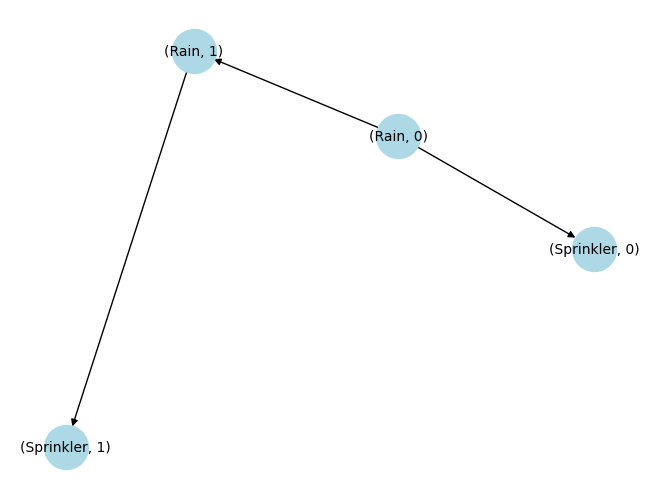

In [21]:
import networkx as nx
import matplotlib.pyplot as plt
from pgmpy.models import DynamicBayesianNetwork as DBN

# ... (Your DBN model creation code) ...

# Create a NetworkX DiGraph object
graph = nx.DiGraph()

# Add edges from the DBN model to the NetworkX graph
for edge in model.edges():
    graph.add_edge(edge[0], edge[1])

# Draw the graph with labels, customized node size, color, and font size
nx.draw(graph, with_labels=True, node_size=1000, node_color='lightblue', font_size=10)

# Display the graph
plt.show()